# Prática 1

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**





**<span style="color:darkred">Atenção: Para as práticas de Aprendizado Dinâmico, disponibilizaremos um notebook com enunciados, como este, que contém apenas alguns códigos auxiliares e possíveis resultados dos desenvolvimentos, e um notebook de soluções com códigos sugeridos. Recomenda-se desenvolver as práticas sem olhar o arquivo de soluções, sempre que possível, para o melhor aprendizado.</span>**

Considere os dados de COVID-19 para a cidade de São Paulo. Nesta prática, aplicaremos os conhecimentos adquiridos na Aula 1, fazendo:

1. Visualização de dados completos e parciais

2. Construiremos gráficos da média móvel simples e exponencialmente ponderada, para casos e para mortes separadamente.

3. Faremos a decomposição das séries em tendência e sazonalidade

## Exercício 1: 

1. Leia os dados de COVID-19 da base covid_caso.csv. 

2. Considere os dados de casos e mortes diárias (diferenças). Salve os dados da cidade de São Paulo num arquivo covidSaoPaulo.csv.

3. Produza um gráfico da séries de casos e mortes diários da cidade de São Paulo desde o primeiro caso.

4. Em seguida, considere o gráfico do log de casos a partir somente do centésimo caso.




In [1]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline



**1. Faça a leitura dos dados a partir do arquivo covid_caso.csv disponível no material do curso.**

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-12-30,AP,NaN,state,67702,919,282,False,845731.0,861773.0,16.0,7856.12917,0.0136
2020-12-29,AP,NaN,state,67405,913,281,False,845731.0,861773.0,16.0,7821.66533,0.0135
2020-12-28,AP,NaN,state,67149,907,280,False,845731.0,861773.0,16.0,7791.95914,0.0135
2020-12-27,AP,NaN,state,66724,901,279,False,845731.0,861773.0,16.0,7742.64220,0.0135
2020-12-26,AP,NaN,state,66293,901,278,False,845731.0,861773.0,16.0,7692.62903,0.0136


**Considere apenas os dados de casos e óbitos diários da cidade de São Paulo. Tome as diferenças para obter dados diários.**


,confirmed,deaths
date,,
2020-02-25,1,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,2,0
2020-02-29,2,0


,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0


**Salve os dados de São Paulo num arquivo covidSaoPaulo.csv.**

**Produza um gráfico da séries de casos e mortes diários da cidade de São Paulo desde o primeiro caso.**

,confirmed,deaths
date,,
2020-02-28,1,0
2020-03-04,1,0
2020-03-05,3,0


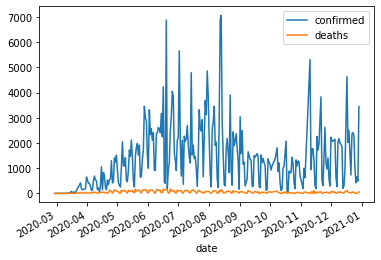

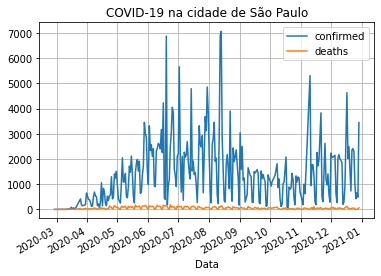

In [8]:
title = 'COVID-19 na cidade de São Paulo'
ylabel = ''
xlabel = 'Data'

ax=covid[covid['confirmed']>0].plot(title=title);
ax.autoscale(axis='both');
ax.set(xlabel=xlabel,ylabel=ylabel);

ax.xaxis.grid(True) # Com grades
ax.yaxis.grid(True)

**4. Considere o gráfico do log de casos a partir somente do centésimo caso.**

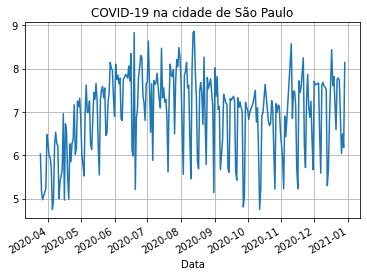

## Exercício 2

1. Construa gráficos da média móvel simples e exponencialmente ponderada para casos. Utilize janela de 7 dias para a MMS e span=7 para MMEP.

2. Construa gráficos da média móvel simples e exponencialmente ponderada para mortes. Utilize janela de 7 dias para a MMS e span=7 para MMEP.


**Construa gráficos da média móvel simples e exponencialmente ponderada para a variável casos.**

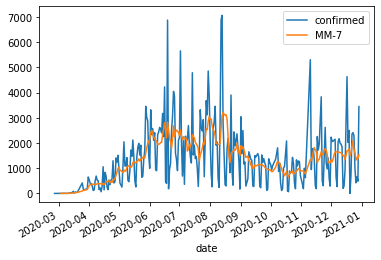

In [11]:
covid[['confirmed','MM-7']].plot();

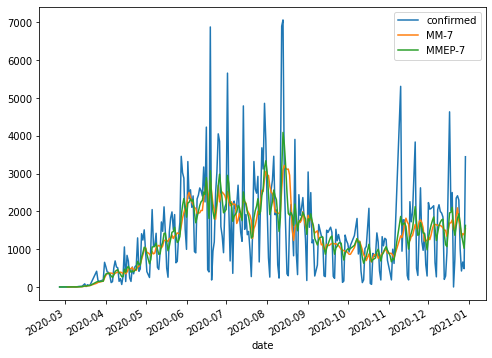

In [13]:
covid[['confirmed','MM-7','MMEP-7']].plot(figsize=(8,6));

**Construa gráficos da média móvel simples e exponencialmente ponderada para a variável mortes (deaths).**

## Exercício 3

Faça a decomposição em tendência e sazonalidade, aditiva e multiplicativa, do número de casos utilizando a função seasonal_decompose do módulo statsmodels.

,confirmed,deaths
date,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,1,0
2020-02-29,0,0
2020-03-01,0,0


DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-07',
               ...
               '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
               '2020-12-28', '2020-12-29'],
              dtype='datetime64[ns]', name='date', length=286, freq=None)

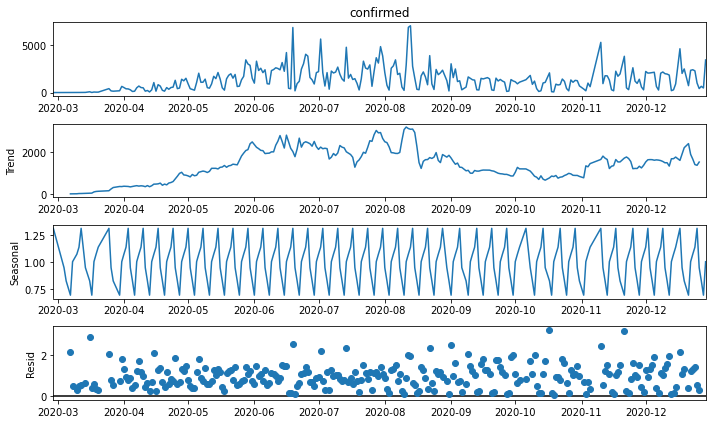

In [16]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

result = seasonal_decompose(covidSP[covidSP['confirmed']>0]['confirmed'], model='multiplicative', period=7)

rcParams['figure.figsize'] = 10, 6

fig = result.plot()

plt.show()



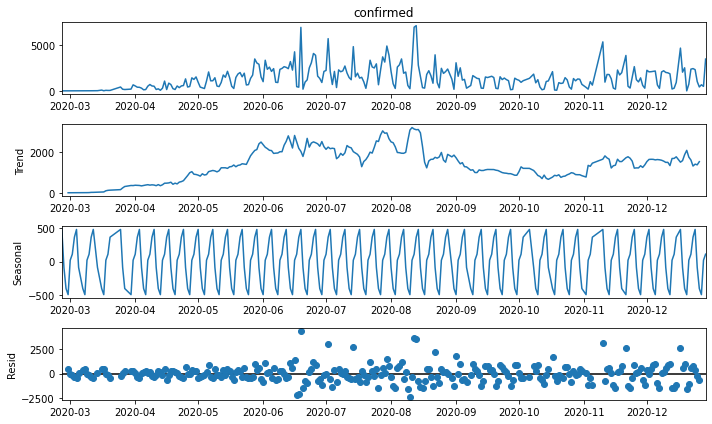

In [17]:

result = seasonal_decompose(covidSP['confirmed'], model='additive', period=7)

rcParams['figure.figsize'] = 10,6

fig = result.plot()

plt.show()


**Na sua opinião, qual o tipo de sazonalidade mais adequada, aditiva ou multiplicativa? Justifique com base nos resíduos.**